In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allendufort/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/allendufort/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/allendufort/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
dataset = pd.read_csv("BBC News Train.csv")
print(dataset.head())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


In [6]:
dataset.shape

(1490, 3)

In [7]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [8]:
# Convert the given news categories into categorical values.
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [9]:
dataset['Category'].factorize()

(array([0, 0, 0, ..., 0, 1, 1]),
 Index(['business', 'tech', 'politics', 'sport', 'entertainment'], dtype='object'))

In [10]:
# Associate Category names with numerical index and save it in new column CategoryId
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [11]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


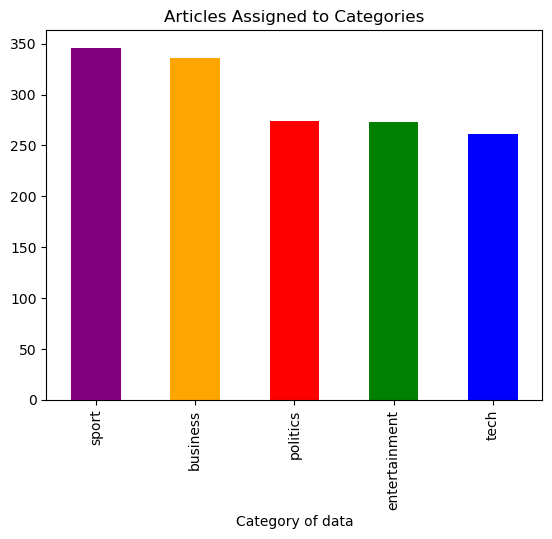

In [12]:
dataset.Category.value_counts().plot(kind = "bar", color = ["purple", "orange", "red", "green", "blue"])
plt.xlabel("Category of data")
plt.title("Articles Assigned to Categories")
plt.show()

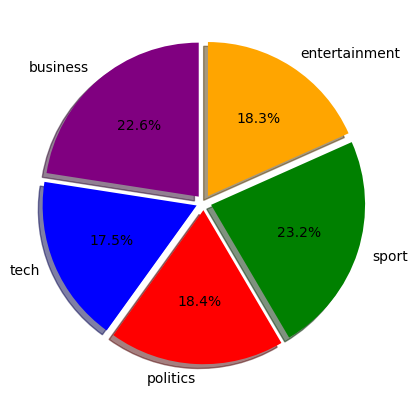

In [13]:
fig = plt.figure(figsize = (5,5))
colors = ["purple", "blue", "red", "green", "orange"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 90,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))


business related words:


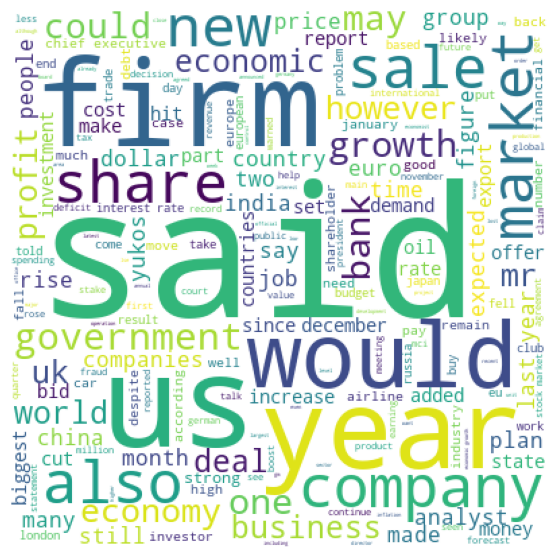

tech related words:


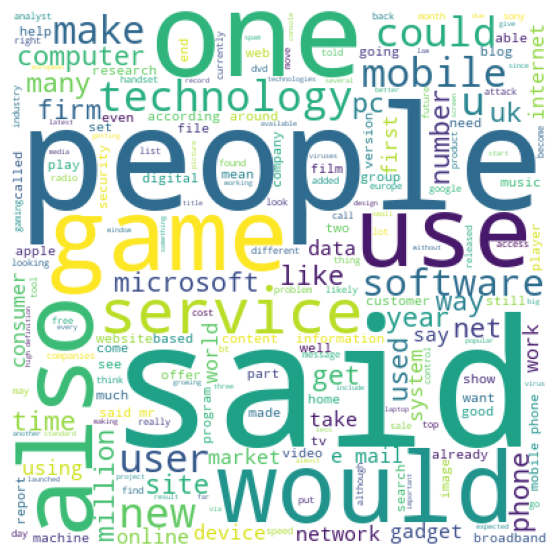

politics related words:


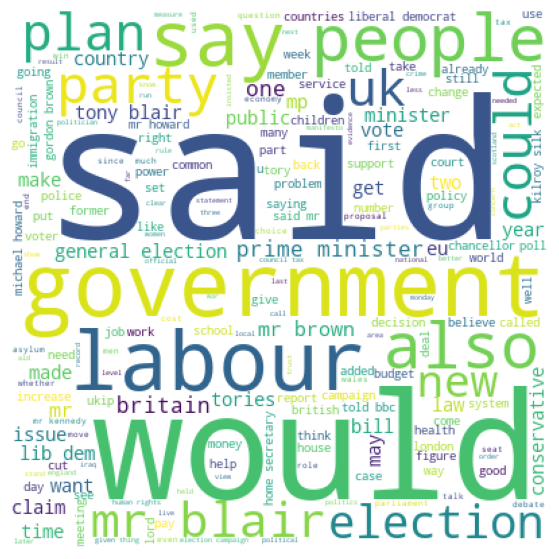

sport related words:


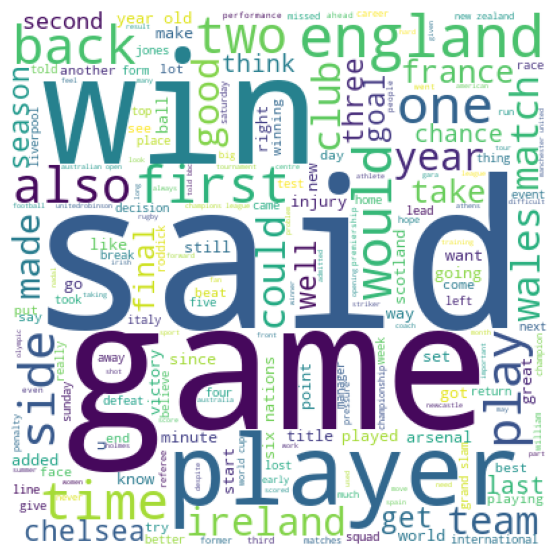

entertainment related words:


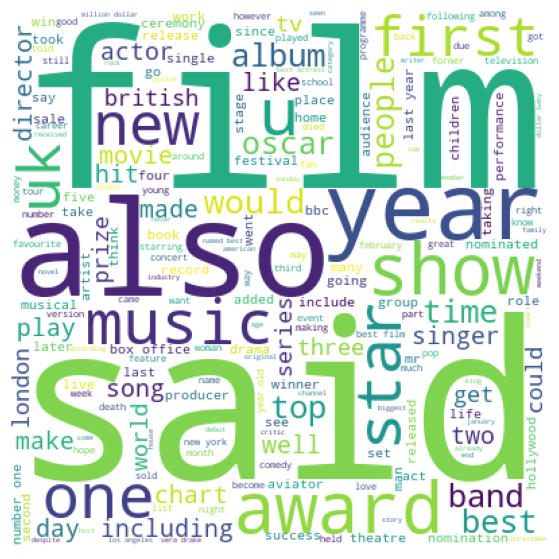

In [14]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]
business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']

def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop, 
                          background_color = color,
                          width = 400, 
                          height = 400).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')


In [15]:
# remove all tags in dataset
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)

In [16]:
# remove all special characters in dataset
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

In [17]:
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

In [18]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/allendufort/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

In [21]:
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [24]:
#create list of model and accuracy dicts
perform_list = [ ]

In [25]:
def run_model(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifier':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbor k=10':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'K Nearest Neighbor k=7':
        mdl = KNeighborsClassifier(n_neighbors=7 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    elif model_name == 'Multilayer Perceptron Classifier':
        mdl = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6,), random_state=1)
        

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
        ])
    )

In [26]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Logistic Regression: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.9709172259507831


In [27]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 97.99
Precision : 0.9798657718120806
Recall : 0.9798657718120806
F1-score : 0.9798657718120806


In [28]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.9709172259507831


In [29]:
run_model('Support Vector Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifier: % 96.64
Precision : 0.9664429530201343
Recall : 0.9664429530201343
F1-score : 0.9664429530201343


In [30]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 82.55
Precision : 0.825503355704698
Recall : 0.825503355704698
F1-score : 0.825503355704698


In [31]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909
Recall : 0.7606263982102909
F1-score : 0.7606263982102909


In [32]:
run_model('K Nearest Neighbor k=10', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbor k=10: % 73.6
Precision : 0.7360178970917226
Recall : 0.7360178970917226
F1-score : 0.7360178970917226


In [33]:
run_model('K Nearest Neighbor k=7', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbor k=7: % 77.63
Precision : 0.7762863534675615
Recall : 0.7762863534675615
F1-score : 0.7762863534675615


In [34]:
# This a neural network
run_model('Multilayer Perceptron Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multilayer Perceptron Classifier: % 97.76
Precision : 0.9776286353467561
Recall : 0.9776286353467561
F1-score : 0.9776286353467561


In [35]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.09,0.97,0.97,0.97
1,Random Forest,97.99,0.98,0.98,0.98
2,Multinomial Naive Bayes,97.09,0.97,0.97,0.97
3,Support Vector Classifier,96.64,0.97,0.97,0.97
4,Decision Tree Classifier,82.55,0.83,0.83,0.83
5,Gaussian Naive Bayes,76.06,0.76,0.76,0.76
6,K Nearest Neighbor k=10,73.60,0.74,0.74,0.74
7,K Nearest Neighbor k=7,77.63,0.78,0.78,0.78
8,Multilayer Perceptron Classifier,97.76,0.98,0.98,0.98


In [36]:
# classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
# classifier
# y_pred = classifier.predict(x_test)

mdl0 = LogisticRegression()

mdl1 = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

mdl2 = MultinomialNB(alpha=1.0,fit_prior=True)

mdl3 = SVC()

mdl4 = DecisionTreeClassifier()

mdl5 = GaussianNB()

mdl6 = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

mdl7 = KNeighborsClassifier(n_neighbors=7 , metric= 'minkowski' , p = 4)

mdl8 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6,), random_state=1)

classifier = OneVsRestClassifier(mdl5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [37]:
y_pred1 = cv.transform(['I took a film class for actors']).toarray()
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [4]:
  result = "Entertainment News"
print(result)

Entertainment News


In [38]:
# I set the default classifier to the most accurate classifier

def phrase_category(phrase, model = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)):
    classifier = OneVsRestClassifier(model)
    classifier.fit(x_train, y_train)
    
    y_pred = cv.transform([phrase]).toarray()
    yy = classifier.predict(y_pred)
    
    result = ""
    if yy == [0]:
      result = "Business News"
    elif yy == [1]:
      result = "Tech News"
    elif yy == [2]:
      result = "Politics News"
    elif yy == [3]:
      result = "Sports News"
    elif yy == [4]:
      result = "Entertainment News"
    
    print(f"\nThe model: {model}")
    print(f"The phrase: '{phrase[:30]}...'")
    print(f"The category: {result}")

In [39]:
model_list = [mdl0, mdl1, mdl2, mdl3, mdl4, mdl5, mdl6, mdl7, mdl8]

In [40]:
# actual category: sports
string = "I want to play kickball"

phrase_category(string)

for mdl_i in model_list:
    phrase_category(string, mdl_i)


The model: RandomForestClassifier(criterion='entropy', random_state=0)
The phrase: 'I want to play kickball...'
The category: Sports News

The model: LogisticRegression()
The phrase: 'I want to play kickball...'
The category: Sports News

The model: RandomForestClassifier(criterion='entropy', random_state=0)
The phrase: 'I want to play kickball...'
The category: Sports News

The model: MultinomialNB()
The phrase: 'I want to play kickball...'
The category: Sports News

The model: SVC()
The phrase: 'I want to play kickball...'
The category: Sports News

The model: DecisionTreeClassifier()
The phrase: 'I want to play kickball...'
The category: Entertainment News

The model: GaussianNB()
The phrase: 'I want to play kickball...'
The category: Entertainment News

The model: KNeighborsClassifier(n_neighbors=10, p=4)
The phrase: 'I want to play kickball...'
The category: Sports News

The model: KNeighborsClassifier(n_neighbors=7, p=4)
The phrase: 'I want to play kickball...'
The category: Spo

In [41]:
# actual category: for fun
sentence = "high schoolers are always depressed"
for mdl_i in model_list:
    phrase_category(sentence, mdl_i)


The model: LogisticRegression()
The phrase: 'high schoolers are always depr...'
The category: Sports News

The model: RandomForestClassifier(criterion='entropy', random_state=0)
The phrase: 'high schoolers are always depr...'
The category: Entertainment News

The model: MultinomialNB()
The phrase: 'high schoolers are always depr...'
The category: Tech News

The model: SVC()
The phrase: 'high schoolers are always depr...'
The category: Sports News

The model: DecisionTreeClassifier()
The phrase: 'high schoolers are always depr...'
The category: Entertainment News

The model: GaussianNB()
The phrase: 'high schoolers are always depr...'
The category: Entertainment News

The model: KNeighborsClassifier(n_neighbors=10, p=4)
The phrase: 'high schoolers are always depr...'
The category: Sports News

The model: KNeighborsClassifier(n_neighbors=7, p=4)
The phrase: 'high schoolers are always depr...'
The category: Sports News

The model: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), rando

In [42]:
# actual category: tech news
sentence = "Subject: Re: Electronic Tesla Coils First of all, realize that Tesla invented AC power generators, motors, transformers, conductors, etc. Technically, *ALL* transformers are Tesla coils.  In general though when someone refers to a Tesla coil, they mean an 'air core resonant transformer'. The TV flyback version Tesla coil (see the _Encyclopedia_of_Electronic_Circuits_ V3, 106-1 for diagram) has NOT an air core. It is of a class of circuit called 'Oscillating Shuttle Circuit' (OSC). Generally OSC's are highly efficient, but this version uses transistors and resistors, which are very lossy devices. Typically Tesla used active reactances instead of passive resistors, so that he could achieve efficiencies of 99.5%, and better. The usual application of an air-core resonant transformer, or of an OSC, is to produce strong EMI for wireless broadcasts. How well do you think your computer screen would work if we removed the HF HV Tesla (flyback) coil from it? If we were to remove from our homes and industries all Tesla coils, our lights would go dark, our cars would sputter and die, our radios would go silent, our industries would grind to a halt, and we would have to go back to using coal for heat, gas for lamps, horses for transportation, steam for power, and telegraph for communication. Is that real world enough for you??????? GET THE MESSAGE! WE WOULD NOT HAVE 1/100 THE CONVIENIENCES WE HAVE TODAY IF NOT FOR TESLA. GIVE CREDIT WHERE CREDIT IS DUE! If it had been up to Edison, we'd still be in the 19th century. (flame me at your own peril. I'm very good at putting edison down).  'Tesla was 100 years ahead of his time. Perhaps now his time comes'."
for mdl_i in model_list:
    phrase_category(sentence, mdl_i)


The model: LogisticRegression()
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Sports News

The model: RandomForestClassifier(criterion='entropy', random_state=0)
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Tech News

The model: MultinomialNB()
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Tech News

The model: SVC()
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Sports News

The model: DecisionTreeClassifier()
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Entertainment News

The model: GaussianNB()
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Entertainment News

The model: KNeighborsClassifier(n_neighbors=10, p=4)
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Sports News

The model: KNeighborsClassifier(n_neighbors=7, p=4)
The phrase: 'Subject: Re: Electronic Tesla ...'
The category: Sports News

The model: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1

In [43]:
# actual category: political paper 
# directory :useless files/20-newsgroups/talk.politics.misc/176845
sentence = "Furthermore, what are the specific charges against the four LAPD officers? Which civil rights or laws are they accused of violating? I believe it is a general charge, that is no specific right is mentioned. I don't think that this is accurate. I believe, and could be wrong, that there IS a specific right allegedly to have been violated, like the 14th or due process or whatever. What about double jeopardy? Has there been any concern that a verdict against Koon, et al. might be overturned upon appeal because they're being tried again for the same actions? (I thought I heard something on the news about this.) The SS has previously ruled that since the seperate governments were in essence seperate sovereigns, then double jeopardy does not apply. (If this is true, then could defendents also be tried under city and county governments?) This mornings paper said that the ACLU has decided to reinstate itsopposition to this kind of thing. They had earlier suspended their opposition while they examined the King case. There might be hope for the ACLU after all. Double jeopardy does not apply, but not for the reasons you quote. Double jeopardy states that a person may not be tried twice on the same charge. However, the police are not on trial for the crime of excessive force or assault. They are NOW on trial for the DIFFERENT crime of violating Mr. King's civil rights. AS for the city and county or state trying you more than once, it most likely will not happen. This is because cities and states have separate laws governing behaviour. For example, in some states, it is an offence to carry marijuana, but not a city offence. Also, I think murder is against federal, but not some state laws."
for mdl_i in model_list:
    phrase_category(sentence, mdl_i)


The model: LogisticRegression()
The phrase: 'Furthermore, what are the spec...'
The category: Sports News

The model: RandomForestClassifier(criterion='entropy', random_state=0)
The phrase: 'Furthermore, what are the spec...'
The category: Politics News

The model: MultinomialNB()
The phrase: 'Furthermore, what are the spec...'
The category: Politics News

The model: SVC()
The phrase: 'Furthermore, what are the spec...'
The category: Sports News

The model: DecisionTreeClassifier()
The phrase: 'Furthermore, what are the spec...'
The category: Entertainment News

The model: GaussianNB()
The phrase: 'Furthermore, what are the spec...'
The category: Politics News

The model: KNeighborsClassifier(n_neighbors=10, p=4)
The phrase: 'Furthermore, what are the spec...'
The category: Sports News

The model: KNeighborsClassifier(n_neighbors=7, p=4)
The phrase: 'Furthermore, what are the spec...'
The category: Sports News

The model: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_stat

In [44]:
# most accurate at classifications in outside tests are:
    # [Index | Classification]
    # [1     | RandomForestClassifier]
    # [2     | MultinomialNB]
    # [7     | MLPClassifier]